# **SENTIMENT ANALYSIS OF IMDB DATA**

MOUNTING MY GOOGLE DRIVE

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



# IMPORTING PACKAGES

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
import spacy
nlp = spacy.load('en_core_web_sm')

# **1.IMPORTING DATAFRAMES**

In [67]:
d_yelp = pd.read_csv('/content/drive/MyDrive/imdb files/yelp_labelled.txt', sep='\t',header=None)
d_amazon = pd.read_csv('/content/drive/MyDrive/imdb files/amazon_cells_labelled.txt',sep='\t',header=None)
d_imdb = pd.read_csv('/content/drive/MyDrive/imdb files/imdb_labelled.txt',sep='\t',header=None)

In [68]:
d_yelp.head()
# review and sentiment
# 0-Negative, 1-Positive for positive review

,0,1
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


## Assign column names

In [69]:

columan_name = ['Review', 'Sentiment']
d_yelp.columns = columan_name

# **2.DATA EXPLORATION**

In [70]:
d_yelp.head()

,Review,Sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [71]:
d_yelp.shape


(1000, 2)

In [72]:
d_amazon.head()


,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [73]:
d_amazon.columns = columan_name

In [74]:
d_amazon.head()

,Review,Sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [75]:
d_amazon.shape

(1000, 2)

In [76]:
d_imdb.head()

,0,1
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [77]:
d_imdb.columns = columan_name

In [78]:
d_imdb.head()

,Review,Sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [79]:
d_imdb.shape

(748, 2)

In [ ]:
# Append all the data in a single dataframe

In [82]:
data = d_yelp.append([d_amazon, d_imdb],ignore_index=True)

In [83]:
data.shape

(2748, 2)

In [84]:
data.head()

,Review,Sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [85]:
data['Sentiment'].value_counts()


1    1386
0    1362
Name: Sentiment, dtype: int64

# CHECKING FOR NULL VALUES

In [86]:
data.isnull().sum()

Review       0
Sentiment    0
dtype: int64

In [87]:
x = data['Review']
y = data['Sentiment']

# **2.DATA CLEANING**

## Create a function to clean the data

In [88]:
import string

In [89]:
punct = string.punctuation

In [90]:
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [91]:
from spacy.lang.en.stop_words import STOP_WORDS

In [93]:
stopwords = list(STOP_WORDS) 

In [94]:
print(stopwords)

['becoming', 'who', '’s', 'there', 'however', 'too', 'may', 'you', "n't", 'n‘t', 'ever', 'might', 'sometime', 'either', 'eleven', 'back', 'by', 'always', 'mine', 'as', 'thereupon', 'amount', 'others', 'using', 'being', 'whole', 'do', 'across', 'afterwards', 'thereafter', 'their', 'next', 'between', 'further', 'a', 'fifty', 'up', 'here', 're', '’m', 'because', 'seeming', 'nowhere', 'move', 'with', 'although', 'herein', 'it', '‘s', 'our', 'that', 'himself', 'of', 'above', 'six', 'under', 'hereupon', 'cannot', 'whenever', 'fifteen', 'hundred', 'such', 'she', 'upon', 'also', 'doing', 'front', 'how', 'nevertheless', 'those', 'n’t', 'whose', 'latter', 'never', 'less', 'than', 'done', 'everyone', 'her', 'via', 'over', 'made', 'yourself', 'again', 'elsewhere', 'well', 'becomes', 'hereby', 'anyone', 'hence', 'really', 'themselves', 'whom', 'regarding', '’ve', 'have', 'seems', 'must', 'twelve', 'whence', 'for', 'thence', 'which', 'every', 'then', 'beyond', 'hers', 'am', 'make', 'and', 'but', 'wh

# DATA CLEANING FUNCTION

In [95]:
def text_data_cleaning(sentence):
  doc = nlp(sentence)

  tokens = [] 
  for token in doc:
    if token.lemma_ != "-PRON-":
      temp = token.lemma_.lower().strip()
    else:
      temp = token.lower_
    tokens.append(temp)
 
  cleaned_tokens = []
  for token in tokens:
    if token not in stopwords and token not in punct:
      cleaned_tokens.append(token)
  return cleaned_tokens

#CREATING WORD CLOUD OF STOPWORDS

In [96]:
from wordcloud import WordCloud,STOPWORDS

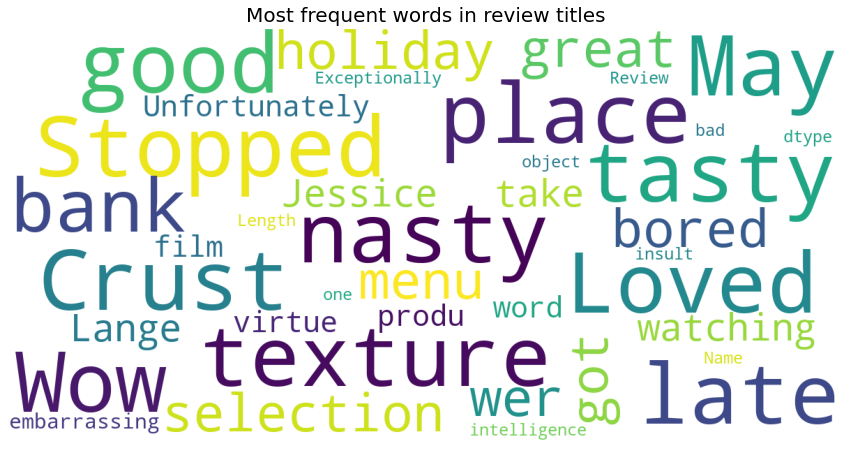

In [97]:
stopwords = set(STOPWORDS) 

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=300,
        max_font_size=40, 
        scale=3,
        random_state=1
        
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    plt.title('Most frequent words in review titles',fontsize=20)
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(data['Review'])

# **LET'S TEST IT**

In [99]:
text_data_cleaning("dogs are angels on earth without wings")


['dog', 'angel', 'earth', 'without', 'wing']

# **3.VECTORIZATION FEATURE ENGINEERING (TF-IDF)**

In [100]:
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

In [101]:
tfidf = TfidfVectorizer(tokenizer=text_data_cleaning)

In [102]:
classifier = LinearSVC()

# **4.TRAINING THE MODEL**

## SPLITTING DATAFRAME INTO TEST AND TRAIN DATA

In [103]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [104]:
x_train.shape, x_test.shape


((2198,), (550,))

In [105]:
x_train.head()

2572    An Italian reviewer called this "a small, grea...
526                          And it was way to expensive.
1509    As an earlier review noted, plug in this charg...
144     Nice blanket of moz over top but i feel like t...
2483    The film gives meaning to the phrase, "Never i...
Name: Review, dtype: object

# FIT THE X_TRAIN AND Y_TRAIN

In [106]:
clf = Pipeline([('tfidf',tfidf), ('clf',classifier)])

In [107]:
clf.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function text_data_cleaning at 0x7f6fa8a5cef0>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept

# **5) PREDICTING THE RESULTS**

In [55]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [56]:
y_prediction = clf.predict(x_test)

## CONFUSION MATRIX

In [57]:
confusion_matrix(y_test, y_prediction)

array([[205,  74],
       [ 52, 219]])

## CLASSIFICATION

In [58]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76       279
           1       0.75      0.81      0.78       271

    accuracy                           0.77       550
   macro avg       0.77      0.77      0.77       550
weighted avg       0.77      0.77      0.77       550



## ACCURACY

In [59]:
accuracy_score(y_test, y_prediction)

0.7709090909090909

# **NOW LET'S TEST IT**

In [61]:
clf.predict(["That's great!"])

array([1])

In [64]:
clf.predict(["The product was bad!"])

array([0])

# **NOTE:**
##array([0]) : Stands for negative review
##array([1]) : Stands for positive review